# attenzione 
ho capito perche mi da l errore di non connettivitá. perche gli artworks non condividono utenti e quindi sono separati.(credo)

In [3]:
from networkx.algorithms import bipartite
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
df = pd.read_csv('output/bipartite_network_weighted_100_5.csv',delimiter=' ',names=['art','user','weight'])
df

,art,user,weight
0,1,111103,NaN
1,1,174177,NaN
2,1,394396,NaN
3,1,1036218,NaN
4,1,1059203,NaN
...,...,...,...
6959,5,5397656105,NaN
6960,5,1100081133,NaN
6961,5,3789807105,NaN
6962,5,4312086123,NaN


In [4]:
# test: questo qua sotto é un netowork bipartito connesso, ho 1 comp da 8 nodi
# a 1 
# b 2
# c 3
# d 4
# d 3
# c 2 
# b 1

G=nx.Graph()
fh=open('output/test.txt','r')

for line in fh.readlines():
    s=line.strip().split()
    #G.add_node(str(s[0]),bipartite=0)
    #G.add_node(int(s[1]),bipartite=1)
    G.add_edge(str(s[0]),int(s[1]))
fh.close()  
print([len(c) for c in sorted(nx.connected_components(G), key=len, reverse=True)])

top = nx.bipartite.sets(G)[1]
top

[8]


{1, 2, 3, 4}

In [32]:
def load_graph(MIN_TILES):
    G=nx.Graph()
    #fh=open('./output/bipartite_network' + str(MIN_TILES) + '.csv','r')
    fh=open('output/bipartite_network_weighted_5_5_battle.csv','r')

    for line in fh.readlines():
        s=line.strip().split()
        #G.add_node(str(s[0]),bipartite=0)
        #G.add_node(int(s[1]),bipartite=1)
        if int(s[2]) >= MIN_TILES:
            G.add_edge(str(s[0]),int(s[1]),weight = int(s[2]))
    fh.close()  
    return G

In [38]:
def max_min_tiles(guess):
    # trova il massimo numero minimo di tiles messe da un utente per cui abbiamo una componente sola!
    G = load_graph(guess)
    n_comps = len([c for c in nx.connected_components(G)])
    MIN_TILES = guess
    while n_comps > 1 :
        MIN_TILES = MIN_TILES -  5
        G  = load_graph(MIN_TILES)
        n_comps = len([c for c in nx.connected_components(G)])
    return G, MIN_TILES

In [45]:
G,MIN_TILES = max_min_tiles(90)
MIN_TILES

40

In [22]:
MIN_TILES = 40

In [23]:
G=nx.Graph()
#fh=open('./output/bipartite_network' + str(MIN_TILES) + '.csv','r')
fh=open('output/bipartite_network_weighted_5_5_battle.csv','r')

for line in fh.readlines():
    s=line.strip().split()
    #G.add_node(str(s[0]),bipartite=0)
    #G.add_node(int(s[1]),bipartite=1)
    if int(s[2]) >= MIN_TILES:
        G.add_edge(str(s[0]),int(s[1]),weight = int(s[2]))
fh.close()  

In [46]:
labels = nx.get_edge_attributes(G,'weight')
l = []
for key in labels:
    l.append(key)

In [47]:
len(labels)

5836

Counter({40: 260, 42: 251, 41: 247, 43: 223, 45: 214, 44: 189, 46: 188, 50: 166, 49: 165, 47: 162, 48: 152, 51: 148, 56: 124, 52: 123, 54: 116, 53: 114, 55: 108, 57: 104, 59: 99, 58: 98, 60: 87, 61: 87, 63: 86, 62: 83, 64: 81, 65: 79, 66: 72, 72: 69, 70: 61, 71: 60, 74: 58, 68: 56, 67: 55, 73: 55, 75: 54, 69: 50, 77: 48, 76: 47, 79: 44, 78: 44, 82: 40, 81: 38, 90: 36, 94: 34, 83: 34, 87: 33, 97: 33, 85: 32, 88: 32, 84: 32, 91: 30, 89: 28, 80: 27, 86: 27, 92: 25, 95: 25, 103: 22, 96: 22, 102: 22, 99: 22, 98: 21, 106: 20, 108: 20, 93: 20, 107: 19, 100: 19, 101: 19, 110: 18, 104: 16, 105: 16, 113: 16, 114: 15, 117: 14, 119: 14, 131: 13, 116: 13, 123: 12, 120: 12, 118: 11, 130: 11, 111: 11, 127: 11, 109: 10, 128: 10, 124: 10, 115: 10, 126: 10, 125: 10, 122: 10, 112: 9, 140: 8, 137: 8, 138: 8, 143: 7, 136: 7, 121: 7, 132: 7, 151: 6, 144: 6, 153: 6, 129: 6, 135: 6, 155: 6, 148: 6, 171: 6, 139: 6, 162: 6, 157: 5, 160: 5, 170: 5, 172: 5, 165: 5, 141: 5, 146: 5, 154: 5, 150: 5, 134: 5, 175: 4, 

(1.0, 10000.0, 1e-05, 1.0)

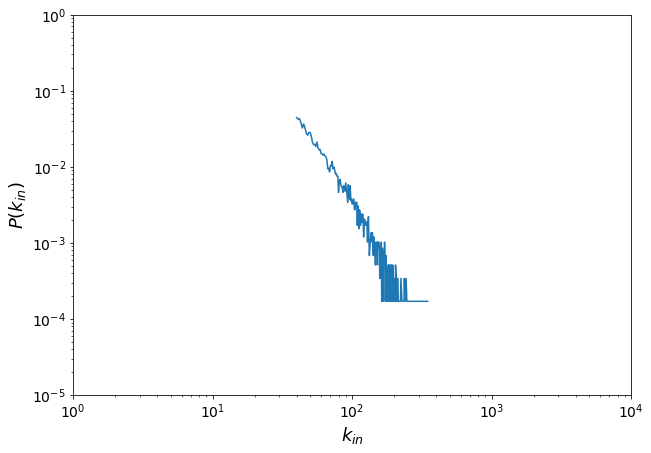

In [48]:
from collections import Counter 
import matplotlib.pyplot as plt

indeg=labels.values()
degin_distri=Counter(indeg)
print(degin_distri)


x=[]
y=[]

for i in sorted(degin_distri):   
    x.append(i)
    y.append(degin_distri[i]/len(G))

plt.figure(figsize=(10,7))    
plt.plot(x,y)

plt.xlabel('$k_{in}$', fontsize=18)
plt.ylabel('$P(k_{in})$', fontsize=18)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.yscale('log')
plt.xscale('log')
plt.axis([1,10000,0.00001,1.0])

In [49]:
[len(c) for c in sorted(nx.connected_components(G), key=len, reverse=True)]

[5836]

In [60]:
S = [G.subgraph(c).copy() for c in nx.connected_components(G)]

In [ ]:
S[0].edges

In [50]:
nx.is_connected(G)

True

In [69]:
nx.is_bipartite(G)

True

In [52]:
top = nx.bipartite.sets(G)[1]
len(top)

5831

In [53]:
B = bipartite.projected_graph(G,top, multigraph=False)

In [ ]:
l = B.degree()


In [54]:
len(B.edges)

4936484

In [ ]:
fh = open('./output/users_network' + str(MIN_TILES) + '.txt', "wb")
nx.write_edgelist(B, fh,delimiter= ' ',data = False)

In [ ]:
#nx.draw(B)

Counter({1: 542413, 2: 59317, 3: 5315, 4: 461, 5: 16, 154301: 1, 78455: 1, 242189: 1, 91715: 1, 112256: 1})


(1.0, 10000.0, 1e-05, 1.0)

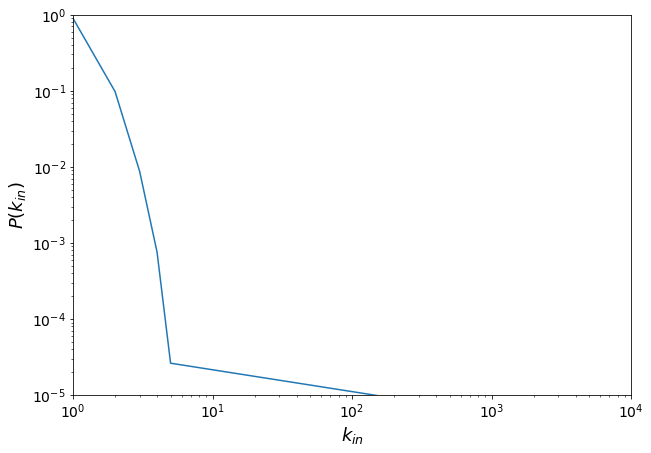

In [70]:
from collections import Counter 
import matplotlib.pyplot as plt

indeg=dict(B.degree()).values()
degin_distri=Counter(indeg)
print(degin_distri)


x=[]
y=[]

for i in sorted(degin_distri):   
    x.append(i)
    y.append(degin_distri[i]/len(B))

plt.figure(figsize=(10,7))    
plt.plot(x,y)

plt.xlabel('$k_{in}$', fontsize=18)
plt.ylabel('$P(k_{in})$', fontsize=18)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.yscale('log')
plt.xscale('log')
plt.axis([1,10000,0.00001,1.0])

In [51]:
nx.number_connected_components(B)

1

In [7]:
import community as community_louvain
import matplotlib.cm as cm
import matplotlib.pyplot as plt

In [8]:
partition = community_louvain.best_partition(B)


In [9]:
# draw the graph
pos = nx.spring_layout(B)
# color the nodes according to their partition


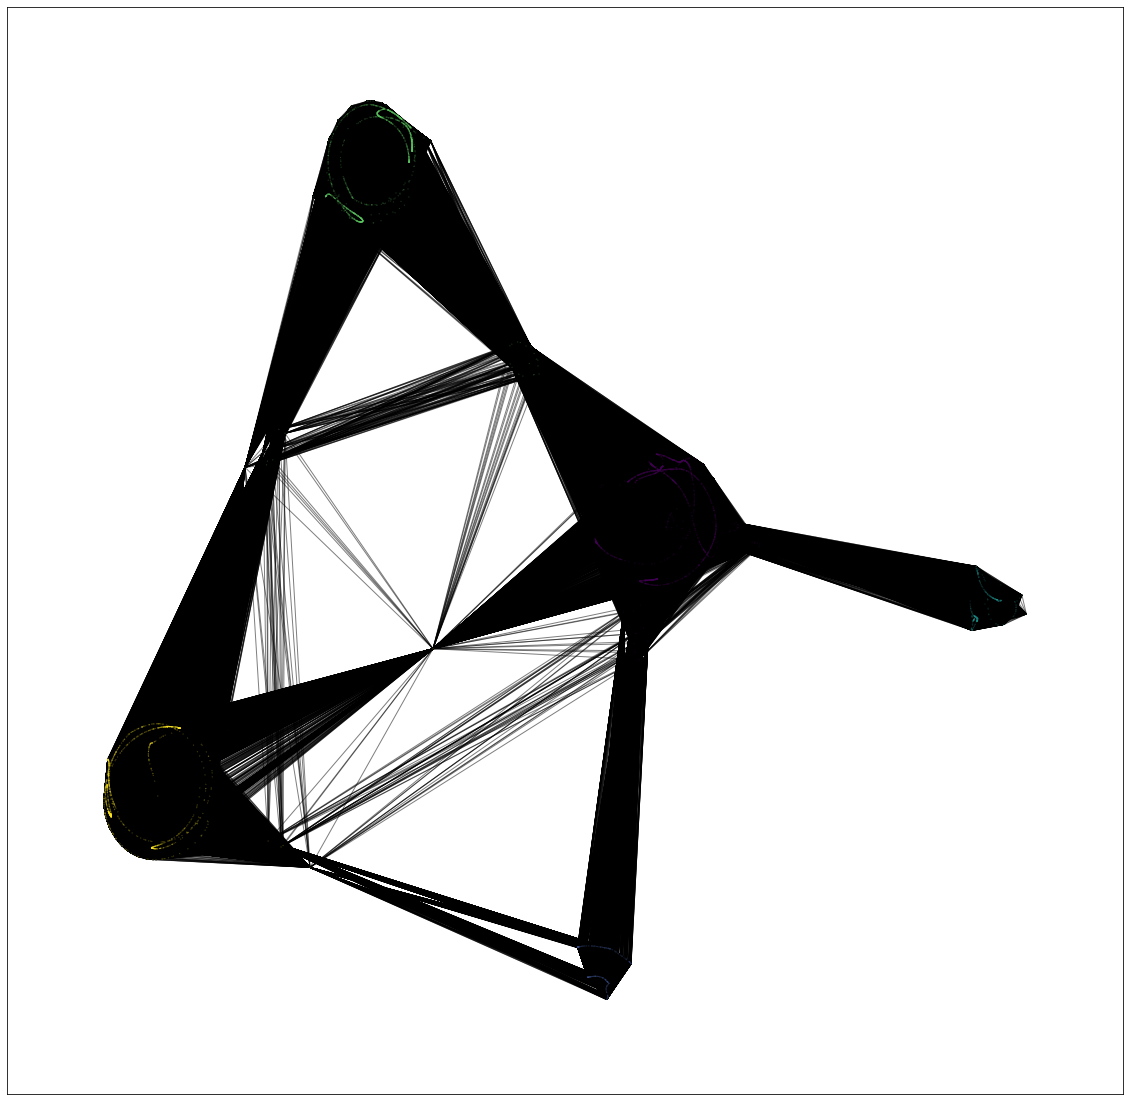

In [10]:
plt.figure(figsize=(20,20)) 
cmap = cm.get_cmap('viridis', max(partition.values()) + 1)
nx.draw_networkx_nodes(B, pos, partition.keys(), node_size=0.01,
                       cmap=cmap, node_color=list(partition.values()))
nx.draw_networkx_edges(B, pos, alpha=0.5)
plt.show()